### AUTHOR: DEVASHREE KIRAN PAWAR
#### DATE: JUNE 19, 2025

In [1]:
%pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Loading required libraries

In [2]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Data loading

In [3]:
df =  pd.read_excel('Data/final dataset.xlsx')
df.info()
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23218 entries, 0 to 23217
Columns: 174 entries, Q1 to source
dtypes: float64(170), object(4)
memory usage: 30.8+ MB
            Q1   Q2     Q3               Q4  \
0  Afghanistan  2.0   27.0      Afghanistan   
1  Afghanistan  4.0  100.0      Afghanistan   
2  Afghanistan  1.0   21.0          Albania   
3  Afghanistan  1.0   18.0          Ecuador   
4  Afghanistan  2.0   26.0            Spain   
5  Afghanistan  4.0   43.0  The Netherlands   
6  Afghanistan  2.0   21.0           Turkey   
7  Afghanistan  2.0   21.0           Turkey   
8  Afghanistan  2.0   22.0           Turkey   
9  Afghanistan  2.0   23.0           Turkey   

                                                  Q5   Q6   Q7   Q8   Q9  Q10  \
0                                     القدس المفتوحة  1.0  1.0  1.0  1.0  1.0   
1                                                456  2.0  2.0  3.0  2.0  4.0   
2                                               منيا  1.0  1.0  1.0  1.0 

#### Data Cleaning and Preprocessing

In [4]:
# Missing values
print(df.isnull().sum())

Q1        1487
Q2         168
Q3         212
Q4         301
Q5         639
          ... 
Q40l      5441
Q40m      5444
Q40n      5434
Q40o      5423
source       0
Length: 174, dtype: int64


In [5]:
# Handle missing values - numerical columns
num_cols = df.select_dtypes(include=['float64','int64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Handle missing values -  categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    
# Check again
df.isnull().sum().sum()

np.int64(0)

#### Exploratory Data Analysis

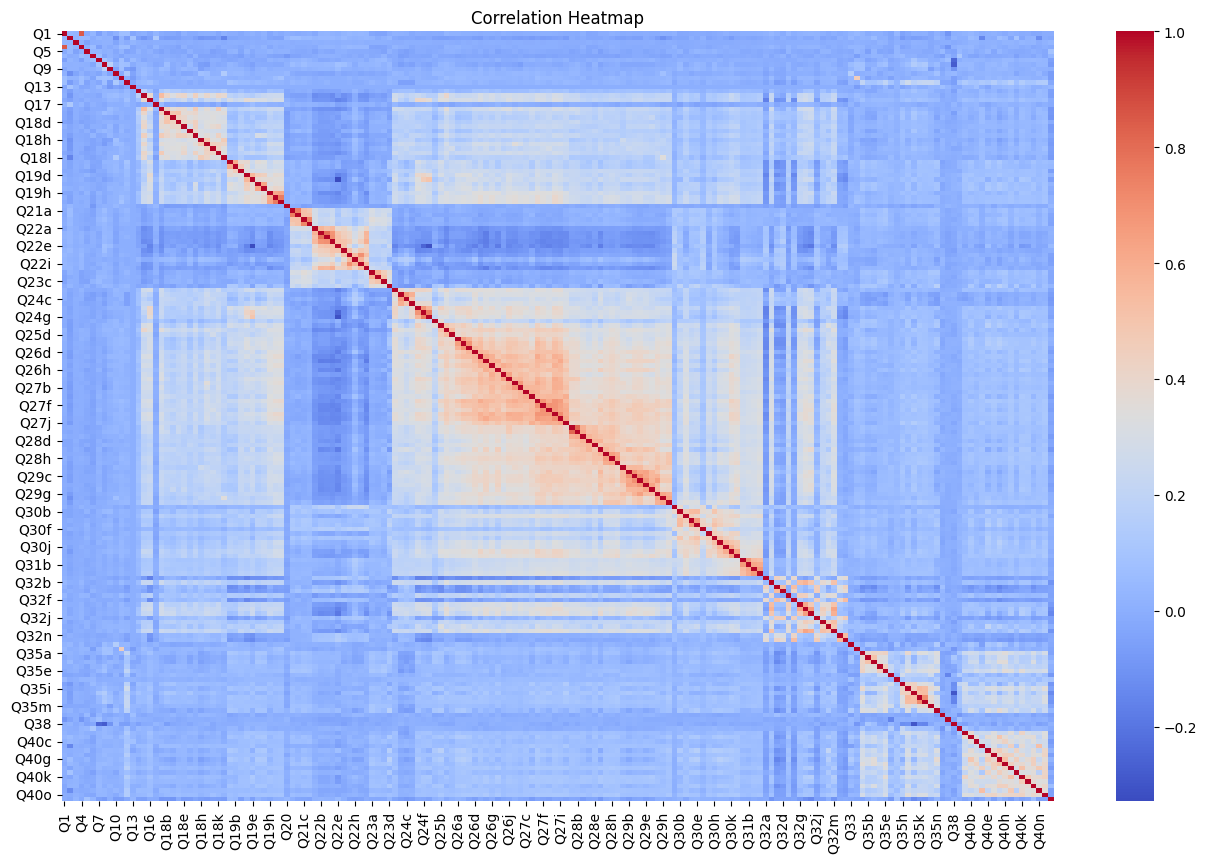

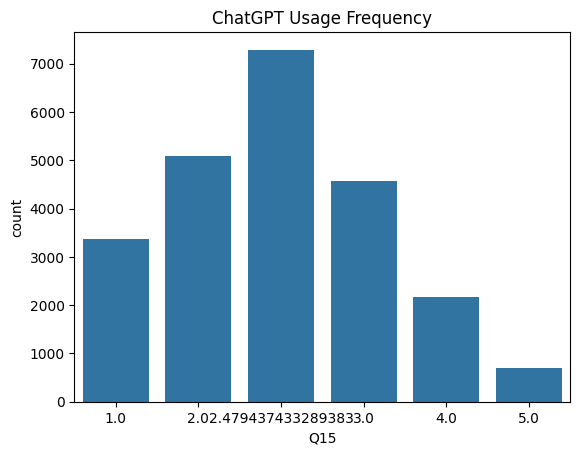

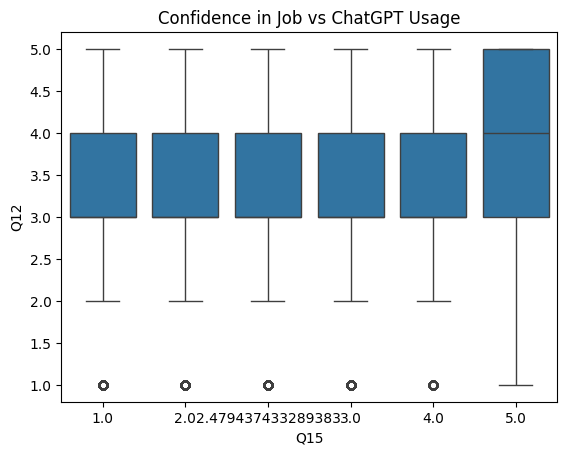

In [9]:
# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Example: ChatGPT Usage Frequency distribution
sns.countplot(x='Q15', data=df)
plt.title('ChatGPT Usage Frequency')
plt.show()

# Example: Confidence in Employability vs ChatGPT usage
sns.boxplot(x='Q15', y='Q12', data=df)
plt.title('Confidence in Job vs ChatGPT Usage')
plt.show()

##### RQ1: How do students around the world perceive the capabilities, trustworthiness, and ethical implications of using ChatGPT in higher education?

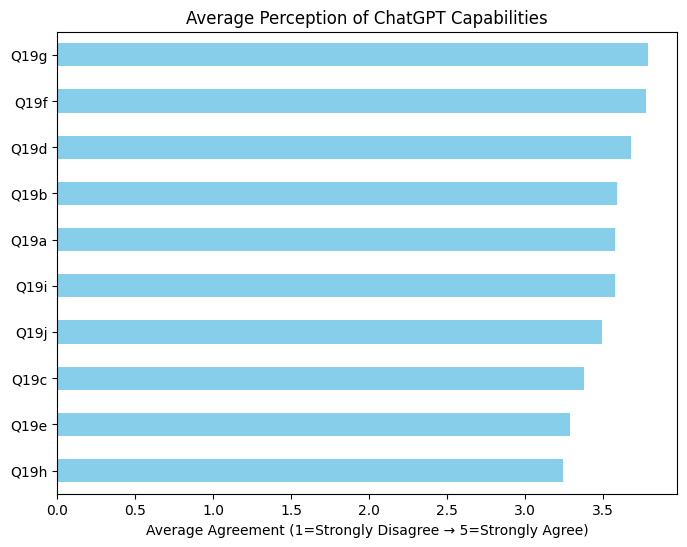

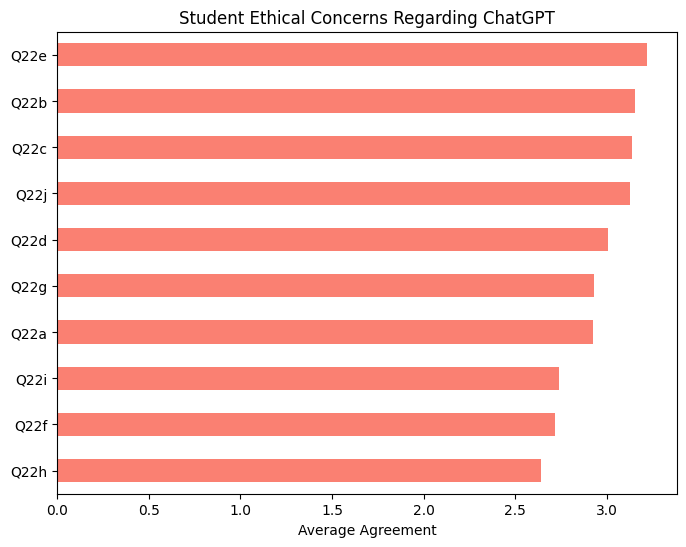

In [15]:
# Let's first check perception of ChatGPT capabilities
capability_cols = df.filter(like = 'Q19').mean().sort_values()
capability_cols.plot(kind='barh', figsize=(8,6), color ='skyblue')
plt.title('Average Perception of ChatGPT Capabilities')
plt.xlabel('Average Agreement (1=Strongly Disagree → 5=Strongly Agree)')
plt.show()

# Lets check ethics of ChatGPT
ethics = df.filter(like='Q22').mean().sort_values()
ethics.plot(kind='barh', figsize=(8,6), color='salmon')
plt.title('Student Ethical Concerns Regarding ChatGPT')
plt.xlabel('Average Agreement')
plt.show()


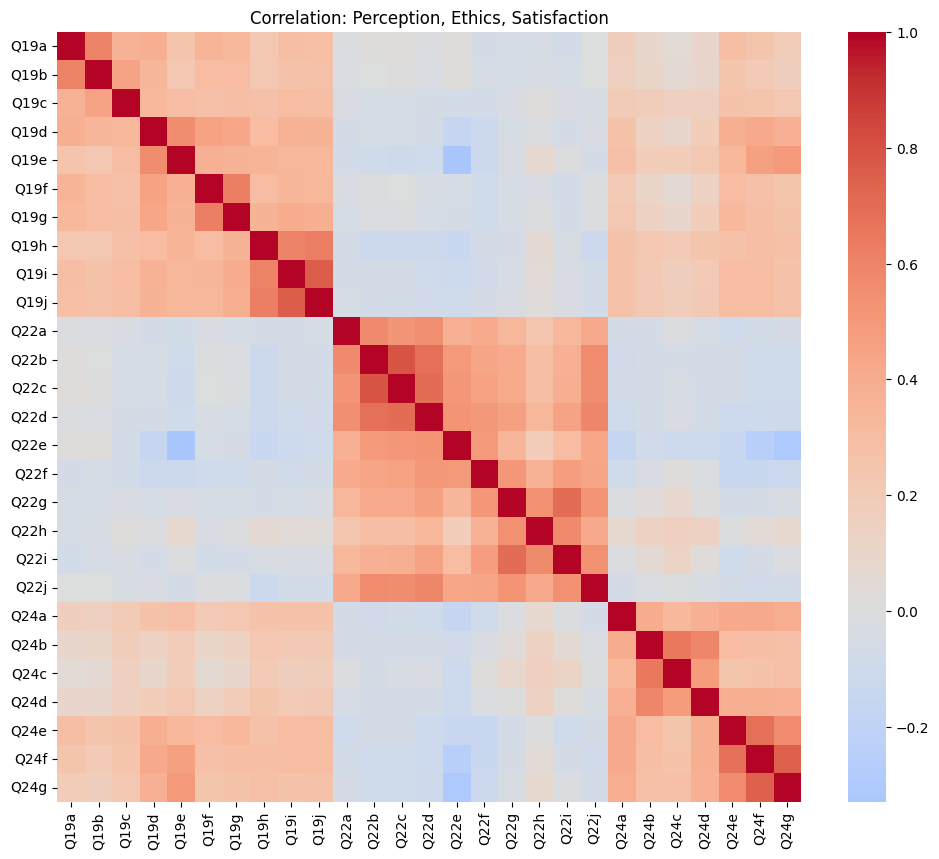

In [17]:
# Let's check satisfaction with ChatGPT over trust and ethics
rq1_vars = df.filter(regex='Q19|Q22|Q24').corr()
plt.figure(figsize=(12,10))
sns.heatmap(rq1_vars, cmap='coolwarm', center=0)
plt.title("Correlation: Perception, Ethics, Satisfaction")
plt.show()
